In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv('../data/final-data.csv', sep='~')

[]

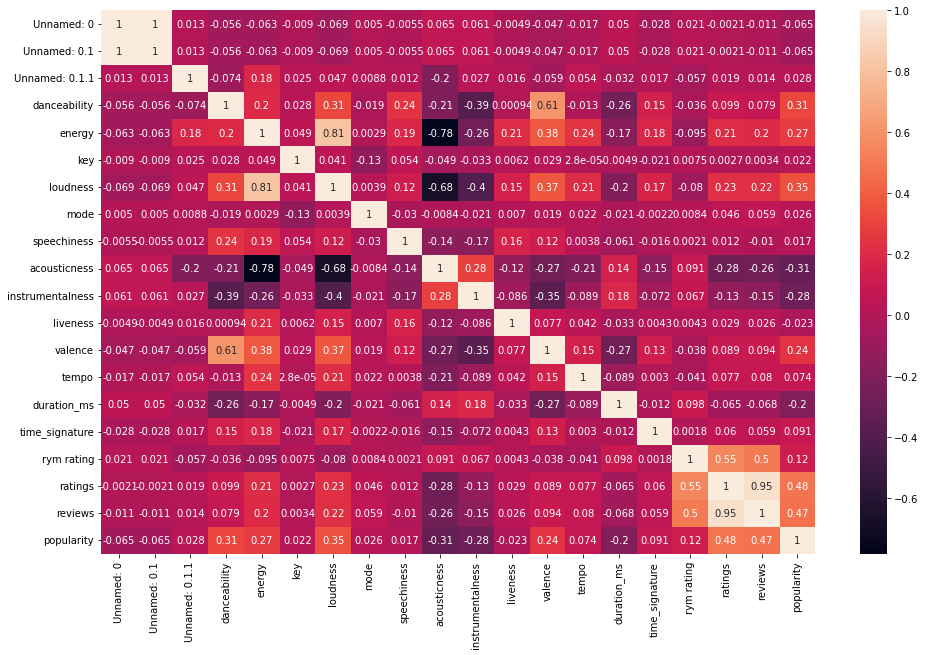

In [5]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [16]:
from sklearn.model_selection import train_test_split
X_df = df[['danceability', 'energy', 'loudness']]
y_df = df['popularity']


X_train, X_test , y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 1)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

m1 = LinearRegression()

# Train the model with training data 
m1.fit(X_train, y_train)

# Make predictions on test data 
y_pred = m1.predict(X_test)


#print the mean squared error
print('mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

# print the r-squared
print('R-squared: %.2f' % r2_score(y_test, y_pred))

mean squared error: 307.91
R-squared: 0.18


In [25]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr = regr.fit(X_train, y_train)
y_pred_1 = regr.predict(X_test)

In [27]:
#print the mean squared error
print('mean squared error: %.2f'% mean_squared_error(y_test, y_pred_1))

# print the r-squared
print('R-squared: %.2f' % r2_score(y_test, y_pred_1))

mean squared error: 302.61
R-squared: 0.19


In [35]:
from sklearn.neighbors import KNeighborsRegressor

n_reg_1 = KNeighborsRegressor(n_neighbors=9).fit(X_train, y_train)
y_pred_nreg = n_reg_1.predict(X_test)

print('mean squared error: %.2f'% mean_squared_error(y_test, y_pred_nreg))

# print the r-squared
print('R-squared: %.2f' % r2_score(y_test, y_pred_nreg))

mean squared error: 339.45
R-squared: 0.09
